#### Task 2P: Working with numpy Vectors (Unidimensional Data)
#### Name: Prateek Singh
#### Student number: 221218743
#### Email: singhprate@deakin.edu.au
#### Unit: SIT731



In [1]:
#Neccessary imports
import numpy as np
import matplotlib.pyplot as plt

#### 1/2. Use numpy.loadtxt to read the above BTC-to-USD data as a numpy vector named rates.

In [2]:
rates = np.loadtxt("BTC-USD.csv") #load all the data from CSV

#### 3. For the 2021 data only (first 365 days), determine and print the following aggregates:<br>
• arithmetic mean,<br>
• median,<br>
• minimum,<br>
• maximum,<br>
• standard deviation,<br>
• interquartile range.

In [3]:
#Setting n_days to 365 for configurability, this variable determines the number of records to be loaded from entore dataset
#In context of this notebook, all the operations are done on first 365 records [0 indexing]
n_days = 365

_mean = np.mean(rates[:n_days])
_median = np.median(rates[:n_days])
_min = np.min(rates[:n_days])
_max = np.max(rates[:n_days])
_sd = np.std(rates[:n_days])
q1 = np.quantile(rates[:n_days], 0.25)
q3 = np.quantile(rates[:n_days], 0.75)
_iqr = q3 - q1

print("Aggregates for first {} days: \nAirtmetic mean: {}, \nMedian: {},"
      "\nMin: {}, \nMaximum: {}, \nstandard deviation: {}, \nIQR: {}".
      format(n_days, _mean, _median, _min, _max, _sd, _iqr)
      )

Aggregates for first 365 days: 
Airtmetic mean: 47436.932021424655, 
Median: 47783.35938,
Min: 29374.15234, 
Maximum: 67566.82813, 
standard deviation: 9774.217757036202, 
IQR: 17869.12109


#### 4. Call matplotlib.pyplot.plot(rates, <...further_arguments...>) to draw the data as a function of the day number (with 0 being the first day), using red dotted line segments. Call matplotlib.pyplot.title to add the plot title

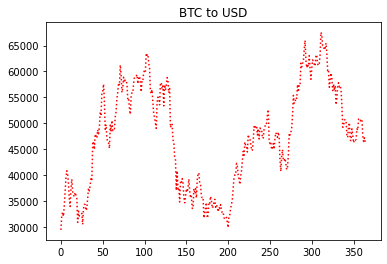

In [4]:
plt.plot(rates[:n_days], linestyle='dotted', color = 'red')
plt.title("BTC to USD")
plt.show()

#### 5. Using matplotlib.pyplot.boxplot, draw a horizontal box-and-whisker plot for the 2021 daily price increases/decreases as obtained by a call to numpy.diff. In your own words (2-3 text paragraphs), explain what can be read from such a plot.
#### Additional Tasks
##### 1. Using an additional call to matplotlib.pyplot.plot, mark the arithmetic mean on the box plot with a blue “x”.

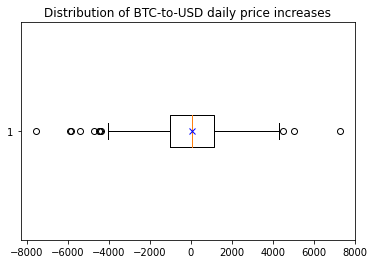

In [5]:
#Calculating price changes
price_changes = np.diff(rates[:n_days])
blue_cross = dict(marker='x', markeredgecolor='blue')
_boxplot = plt.boxplot(price_changes, vert=False, meanprops=blue_cross, showmeans=True)
plt.title("Distribution of BTC-to-USD daily price increases")
plt.show()

The boxplot is a useful tool to describe interesting traits about the data. We can observe mean, median and IQR of a given data distibution from such plots. These descriptions are useful in identifying hidden patterns in the data. They are also useful indicators in assessing the normal behavior of the data and identifying the outliers.<br>
In this plot the blue cross represents the mean of the price changes of BTC over the year 2021. Whereas, the vertical line inside the box represents the median, a key observation to be done via this boxplot is that because the mean and median are aligned therefore, this boxplot represents a <b> uniform </b> distribution of the data. In other scenarios, when the mean and median do not overlap then the data contains some sort of skewness (right skewed when mean greater than median, left when mean smaller than median).<br>
Other key observation to be done is the ouliers, the outer lines outside the box represent the lower and higher limit whiskes (1.5 times q1 and q3 respectively). All the points which lie beyond these limits are considered to be outliers (do not follow similar trends as compared to the rest of the data).

#### 2. Determine the day numbers (with 0 being the first day) with the lowest and highest observed prices in 2021.

In [6]:
highest_day = np.argmax(rates[:n_days]) #index/ daynumber for highest observed price in 2021
lowest_day = np.argmin(rates[:n_days])#index/ daynumber for lowest observed price in 2021
print("Price highest at day number:", highest_day, "\nPrice lowest at day number:", lowest_day)

Price highest at day number: 311 
Price lowest at day number: 0


#### 3. Count (programmatically) how many outliers are there on the boxplot (for the definition of an outlier, consult Section 2.3. of our learning materials on the unit site). In your own words, explain what such outliers might mean in the current context.

In [7]:
##Calculating IQR and lower and upper limit whiskers to identify outliers
price_q1 = np.quantile(price_changes, 0.25)
price_q3 = np.quantile(price_changes, 0.75)
price_iqr = price_q3 - price_q1
lower_limit = price_q1 - (1.5 * price_iqr) #set lower limit whisker
upper_limit = price_q3 + (1.5 * price_iqr) #set higher limit whisker

##All points lesser than the lower limit whisker 
##and all points higher than the higher limit whisker will be considered as outliers

num_outliers = len(price_changes[(price_changes <= lower_limit) | (price_changes >= upper_limit)])
print("The total number of outliers in the boxplot are:", num_outliers)

The total number of outliers in the boxplot are: 11


The outliers represent the data points which do not behave or which are atypical than the rest of the data. Here, the boxplot represents the price change of BTC over the year 2021. In this context, the outliers represent hih price rate changes or low price rate changes as compared to the usual behavior of BTC prices in the year 2021. When the price change is too large then the outliers lie on the right side of the highest whisker, whereas they lie on the left side of the lowest whisker if the price change is too low as compared to the normal behavior.